In [8]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
%matplotlib inline

In [10]:
path = 'C:/Users/Owner/Documents/Chocolate Bar Analysis/02 Data/Original Data'

In [11]:
df = pd.read_csv(os.path.join(path, 'Chocolate_bar_ratings.csv'))

In [12]:
#Data Cleaning

df.columns

Index(['ref', 'manufacturer', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin', 'cocoa_percent',
       'number_of_ingredients', 'ingredients', 'characteristics', 'rating'],
      dtype='object')

In [13]:
df.head(20)

,ref,manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin,cocoa_percent,number_of_ingredients,ingredients,characteristics,rating
0,1776,Forteza (Cortes),Puerto Rico,2016,Dominican Republic,Puerto Rico,0.800,6,"B,S,C,V,L,Sa","vanilla, dried fruit, nuts",2.75
1,1776,Forteza (Cortes),Puerto Rico,2016,Dominican Republic,Dominican Republic,0.700,6,"B,S,C,V,L,Sa","strong vanilla, earthy, nutty",2.75
2,1992,Alain Ducasse,France,2017,Mexico,"Porcelana, Mexique",0.750,6,"B,S,C,V,L,Sa","strawberry, cream, gateway",3.50
3,1215,Alain Ducasse,France,2014,Trinidad,Trinite,0.650,6,"B,S,C,V,L,Sa","roasty, sweet, savory",2.75
4,741,Grand Place,Vietnam,2011,Vietnam,"Ben Tre, Dong Nai",0.720,5,"B,S,C,V,L","fatty, vanilla, dairy",3.00
5,1662,El Rey,Venezuela,2015,Venezuela,San Joaquin,0.700,5,"B,S,C,V,L","spicy, caramel, vanilla",3.75
6,439,El Rey,Venezuela,2009,Venezuela,"Rio Caribe, Macuro",0.700,5,"B,S,C,V,L","sandy,bold,cherry,peanut butter",3.00
7,439,El Rey,Venezuela,2009,Venezuela,"Rio Caribe, Cariaco",0.605,5,"B,S,C,V,L","very sweet, marshmallow",2.75
8,206,El Rey,Venezuela,2008,Venezuela,"Carenero Superior, Mijao",0.610,5,"B,S,C,V,L","muted, cherry, banana",3.00
9,206,El Rey,Venezuela,2008,Venezuela,"Carenero Superior, Bucare",0.580,5,"B,S,C,V,L","gritty, sweet, banana, smoke",2.50


In [14]:
df.shape

(2501, 11)

In [15]:
df.isnull().sum()

ref                       0
manufacturer              0
company_location          0
review_date               0
country_of_bean_origin    0
specific_bean_origin      0
cocoa_percent             0
number_of_ingredients     0
ingredients               0
characteristics           0
rating                    0
dtype: int64

In [16]:
dups = df.duplicated()

In [17]:
dups.shape

(2501,)

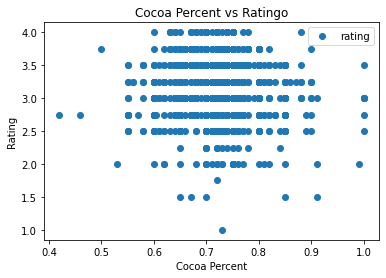

In [42]:
df.plot(x = 'cocoa_percent', y='rating',style='o')
plt.title('Cocoa Percent vs Ratingo')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')
plt.show()

 # Hypothesis
 
 Candy bars with Cocoa percentages between .65 and .75 will have the highest amount of high rates choclate bars

In [24]:
X = df['cocoa_percent'].values.reshape(-1,1)
y = df['rating'].values.reshape(-1,1)

In [25]:
X

array([[0.8 ],
       [0.7 ],
       [0.75],
       ...,
       [1.  ],
       [1.  ],
       [1.  ]])

In [26]:
y

array([[2.75],
       [2.75],
       [3.5 ],
       ...,
       [3.5 ],
       [3.  ],
       [3.  ]])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
# Regression Analysis

regression = LinearRegression()

In [29]:
regression.fit(X_train, y_train)

LinearRegression()

In [30]:
y_predicted = regression.predict(X_test)

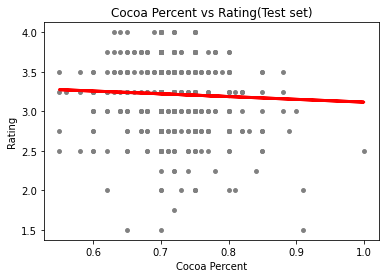

In [32]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cocoa Percent vs Rating(Test set)')
plot_test.xlabel('Cocoa Percent')
plot_test.ylabel('Rating')
plot_test.show()

In [33]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [34]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.34984555]]
Mean squared error:  0.19225930661686816
R2 score:  0.009190483471846367


In [35]:
y_predicted

array([[3.22848533],
       [3.19350077],
       [3.20399614],
       [3.22148842],
       [3.22148842],
       [3.22148842],
       [3.22148842],
       [3.21449151],
       [3.21449151],
       [3.22148842],
       [3.22148842],
       [3.21449151],
       [3.21449151],
       [3.22148842],
       [3.22148842],
       [3.21099305],
       [3.22148842],
       [3.21449151],
       [3.20399614],
       [3.22148842],
       [3.22148842],
       [3.22848533],
       [3.22848533],
       [3.25647297],
       [3.22148842],
       [3.23898069],
       [3.22148842],
       [3.21099305],
       [3.18650386],
       [3.22148842],
       [3.20399614],
       [3.20049768],
       [3.19699923],
       [3.22148842],
       [3.22848533],
       [3.22148842],
       [3.23198378],
       [3.19000232],
       [3.22148842],
       [3.21099305],
       [3.22148842],
       [3.19699923],
       [3.22148842],
       [3.21449151],
       [3.22148842],
       [3.22148842],
       [3.2074946 ],
       [3.217

In [36]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.75,3.228485
1,2.25,3.193501
2,2.75,3.203996
3,3.00,3.221488
4,3.50,3.221488
5,3.50,3.221488
6,3.25,3.221488
7,3.50,3.214492
8,2.25,3.214492
9,3.00,3.221488


In [37]:
y_predicted_train = regression.predict(X_train)

In [38]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.34984555]]
Mean squared error:  0.17724576202766099
R2 score:  0.001868876279303544


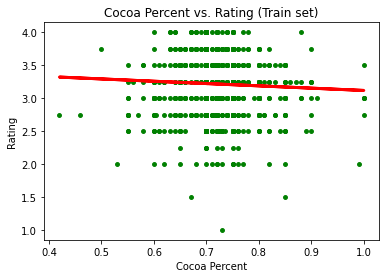

In [40]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Cocoa Percent vs. Rating (Train set)')
plot_test.xlabel('Cocoa Percent')
plot_test.ylabel('Rating')
plot_test.show()

# Conclusion

There is very little to no correclation on percentage of cocoa to the rating of a choclate bar. 